In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
middle-C=261.63 Hz
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1536 samples, duration=1.0 sec = 28 time steps
Max frequency=8000 Hz --> freq_buckets=742
1 sample = 742 x 28 = 20,776


In [3]:
# Read all available samples and convert to STFTs
# This only needs to be done if the samples change or we change parameters such as the STFT size or the sample duration.

#make_STFTs()

Loaded 1017 STFTs from STFTs.pkl
Using train=813 samples, test=204 samples.
Training data set has 813 samples.
742 frequencies, 28 time-steps, maximum model size is 4,155,200 parameters.
Optimising hyper-parameters:


[Integer(low=4, high=7, prior='uniform', transform='identity'),
 Real(low=1e-06, high=9.999999999999999e-05, prior='log-uniform', transform='identity'),
 Integer(low=4, high=10, prior='uniform', transform='identity'),
 Integer(low=1, high=3, prior='uniform', transform='identity'),
 Real(low=0.1, high=10, prior='log-uniform', transform='identity')]

Hyper-Parameter tuning#1: STFT_VAE [7, 9.962074858937224e-06, 5, 2, 1.9745710287721336]

optimiser: Adam batch=128, learning_rate=0.0013, weight_decay=0
STFT_VAE latent=5, layers=2, ratio=1.97
Model is too large: approx 643,924,596 parameters vs max=50,000,000
Hyper-Parameter tuning#2: STFT_VAE [5, 9.962074858937224e-05, 8, 3, 0.19745710287721338]

optimiser: Adam batch=32, learning_rate=0.0032, weight_decay=0
STFT_VAE latent=8, layers=3, ratio=0.20
Model is too large: approx 181,714,834 parameters vs max=50,000,000
Hyper-Parameter tuning#3: STFT_VAE [6, 3.150284677534224e-05, 9, 2, 0.6244141852701812]

optimiser: Adam batch=64, learning_rate=0.002, weight_decay=0
STFT_VAE latent=9, layers=2, ratio=0.62
Model is too large: approx 303,728,418 parameters vs max=50,000,000
Hyper-Parameter tuning#4: STFT_VAE [5, 3.150284677534224e-06, 6, 1, 6.244141852701813]

optimiser: Adam batch=32, learning_rate=0.0001, weight_decay=0
STFT_VAE latent=6, layers=1, ratio=6.24
sizes=[20776, 6]
Variational

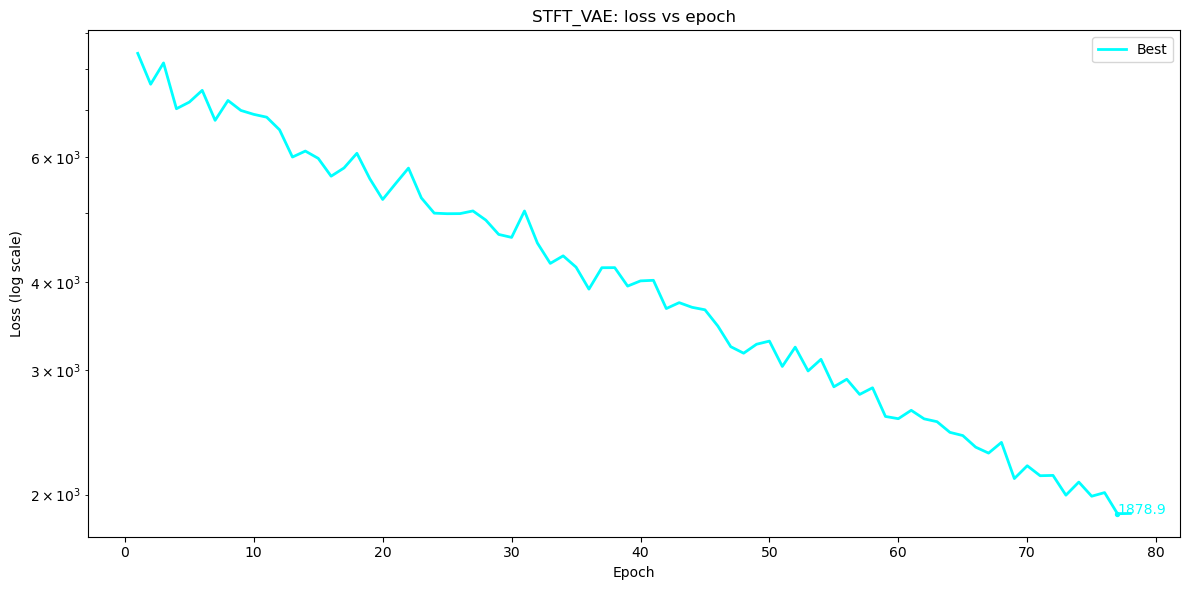

Hyper-Parameter tuning#5: STFT_VAE [5, 5.6020863778202186e-05, 9, 2, 1.1103828890021925]

optimiser: Adam batch=32, learning_rate=0.0018, weight_decay=0
STFT_VAE latent=9, layers=2, ratio=1.11
Model is too large: approx 463,940,011 parameters vs max=50,000,000
Hyper-Parameter tuning#6: STFT_VAE [6, 5.6020863778202186e-06, 6, 3, 0.11103828890021926]

optimiser: Adam batch=64, learning_rate=0.00036, weight_decay=0
STFT_VAE latent=6, layers=3, ratio=0.11
Model is too large: approx 103,794,242 parameters vs max=50,000,000
Hyper-Parameter tuning#7: STFT_VAE [6, 1.7715352602914472e-05, 7, 2, 3.5113390041248587]

optimiser: Adam batch=64, learning_rate=0.0011, weight_decay=0
STFT_VAE latent=7, layers=2, ratio=3.51
Model is too large: approx 788,033,340 parameters vs max=50,000,000
Hyper-Parameter tuning#8: STFT_VAE [4, 1.7715352602914472e-06, 4, 1, 0.3511339004124859]

optimiser: Adam batch=16, learning_rate=2.8e-05, weight_decay=0
STFT_VAE latent=4, layers=1, ratio=0.35
sizes=[20776, 4]
Vari

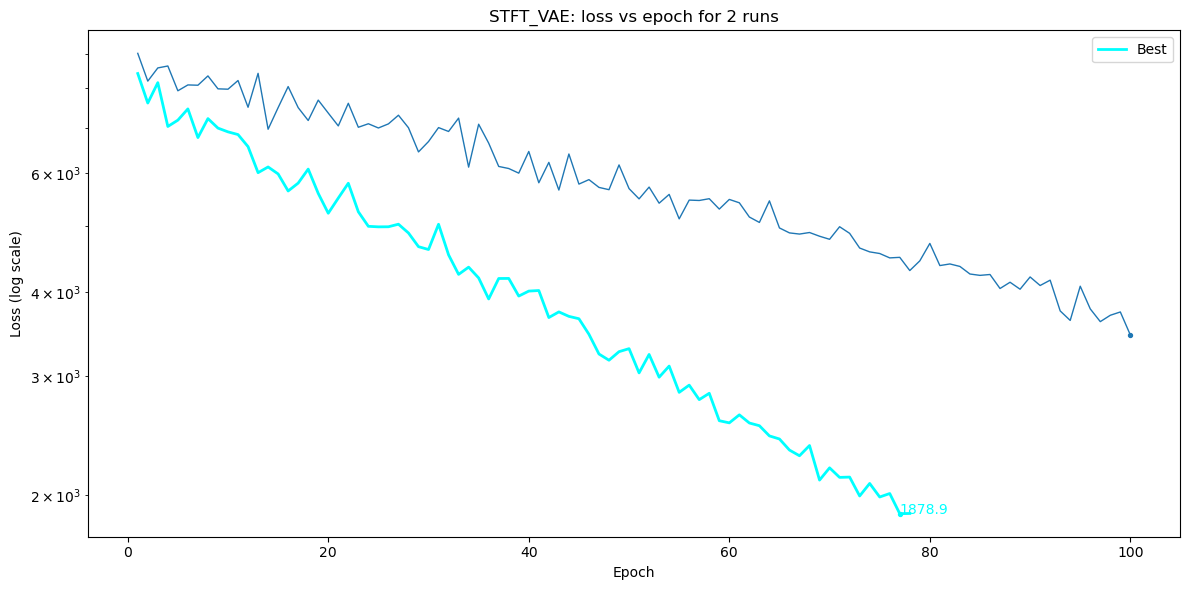

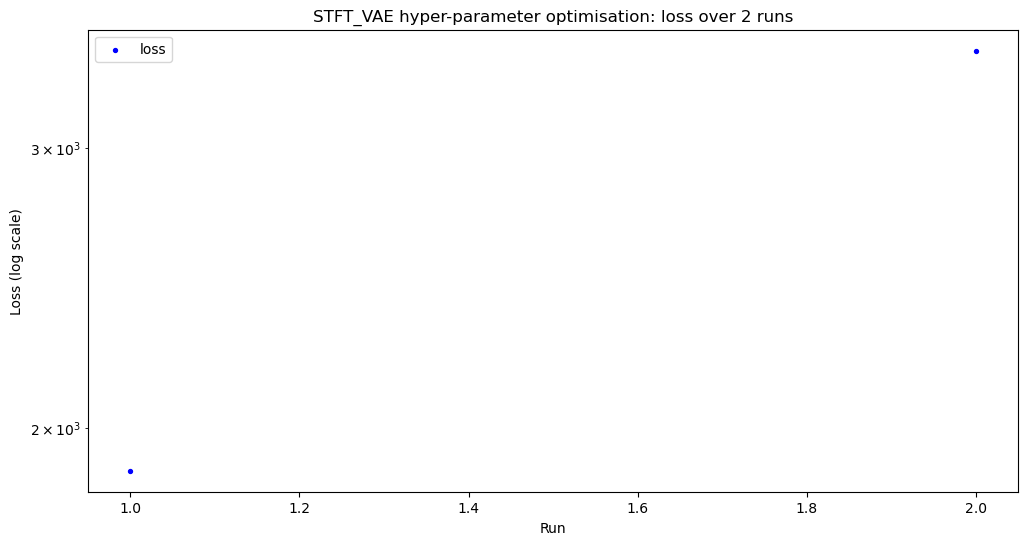

Hyper-Parameter tuning#9: STFT_VAE [7, 9.999999999999999e-05, 10, 1, 10.0]

optimiser: Adam batch=128, learning_rate=0.013, weight_decay=0
STFT_VAE latent=10, layers=1, ratio=10.00
sizes=[20776, 10]
VariationalAutoEncoder: layers=[20776, 10], parameters=644,076, compression=2077.6
model: STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%)
train=813 samples, batch=128 --> 6.4 batches/epoch
Adam: 644,076 trainable parameters
model size penalty=1.0
*** Best! loss=93.31, without size penalty 92.34
STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%)
Adam batch=128, learning_rate=0.013, weight_decay=0
hyper-parameters: [7, 9.999999999999999e-05, 10, 1, 10.0]


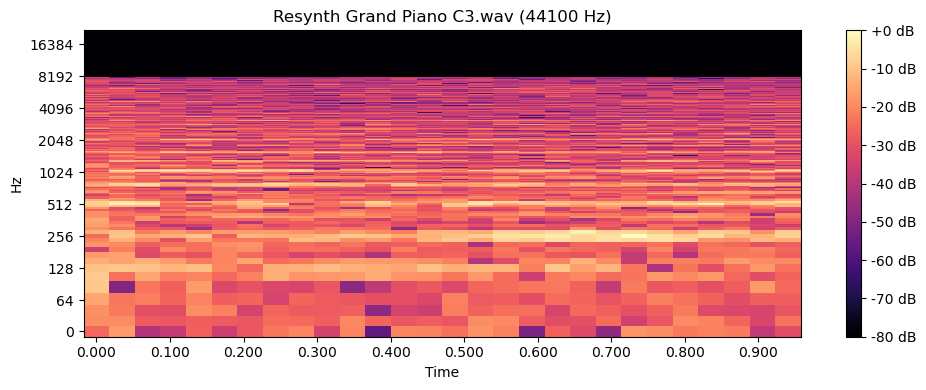

*** Best! loss=86.89, without size penalty 85.92
STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%)
Adam batch=128, learning_rate=0.013, weight_decay=0
hyper-parameters: [7, 9.999999999999999e-05, 10, 1, 10.0]


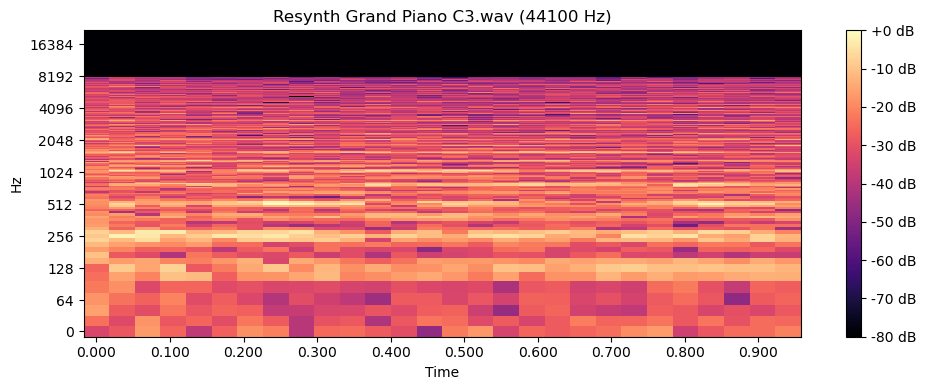

*** Best! loss=82.03, without size penalty 81.07
STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%)
Adam batch=128, learning_rate=0.013, weight_decay=0
hyper-parameters: [7, 9.999999999999999e-05, 10, 1, 10.0]


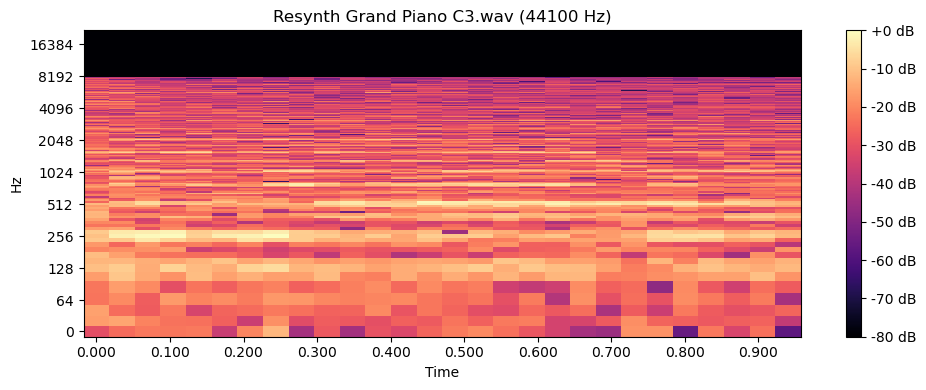

total=4 sec, epoch=57 (0.1 sec/epoch), train=87.42 (-3.41%), test=78.26 (-0.43%), overfit=0.90
Model doesn't generalise: overfit=0.5


Finished Training after 68 epochs in 4.5 sec (0.07 sec/epoch), sample duration=1.0 sec, test loss=96.84, train loss=128.79, overfit=0.8


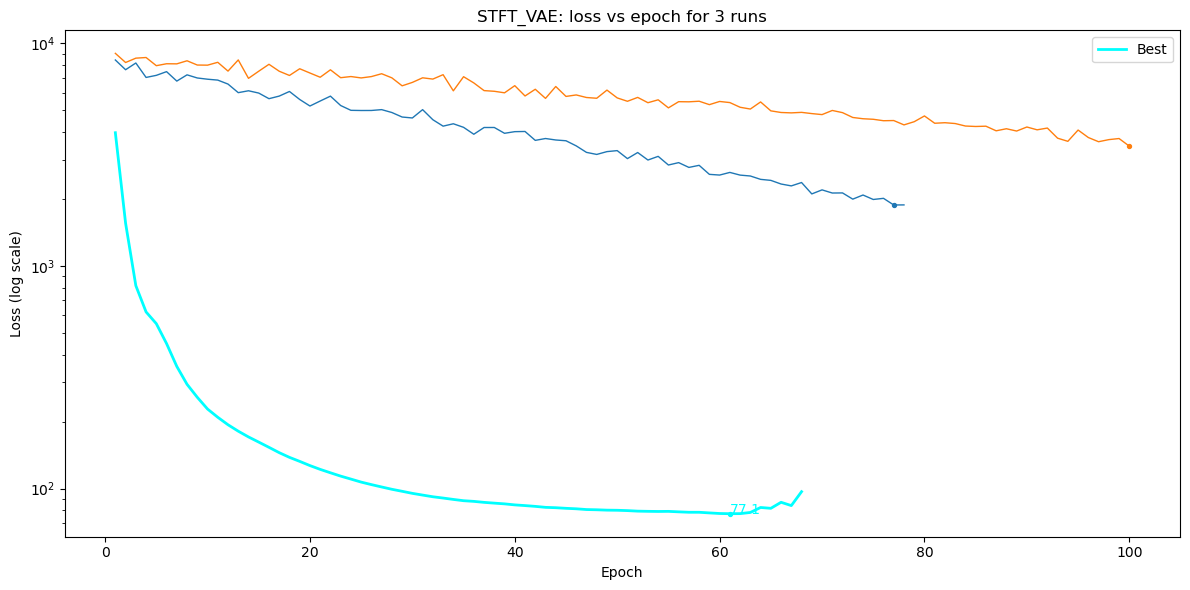



Best Models:
	1: loss=77.1, for STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%) | Adam batch=128, learning_rate=0.013, weight_decay=0
	2: loss=1878.9, for STFT_VAE latent=6, layers=1, ratio=6.24 (params=394,756, trainable=394,756 = 100.0%) | Adam batch=32, learning_rate=0.0001, weight_decay=0
	3: loss=3453.8, for STFT_VAE latent=4, layers=1, ratio=0.35 (params=270,096, trainable=270,096 = 100.0%) | Adam batch=16, learning_rate=2.8e-05, weight_decay=0


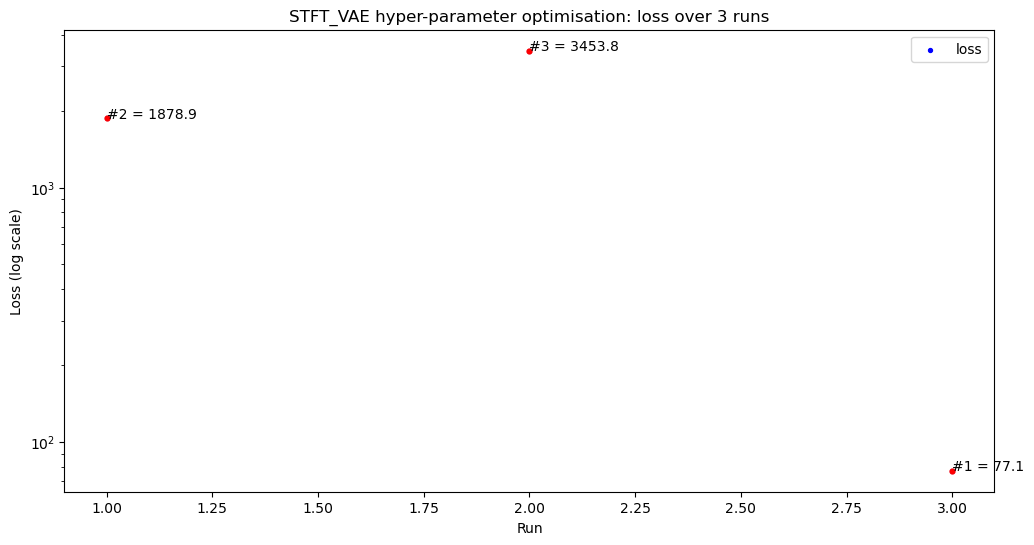

Hyper-Parameter tuning#10: STFT_VAE [7, 1e-06, 4, 1, 10.0]

optimiser: Adam batch=128, learning_rate=0.00013, weight_decay=0
STFT_VAE latent=4, layers=1, ratio=10.00
sizes=[20776, 4]
VariationalAutoEncoder: layers=[20776, 4], parameters=270,096, compression=5194.0
model: STFT_VAE latent=4, layers=1, ratio=10.00 (params=270,096, trainable=270,096 = 100.0%)
train=813 samples, batch=128 --> 6.4 batches/epoch
Adam: 270,096 trainable parameters
model size penalty=0.9
Early stopping at epoch=20, train loss=7438.4 vs best=141.5, ratio=51.9


Best Models:
	1: loss=77.1, for STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%) | Adam batch=128, learning_rate=0.013, weight_decay=0
	2: loss=1878.9, for STFT_VAE latent=6, layers=1, ratio=6.24 (params=394,756, trainable=394,756 = 100.0%) | Adam batch=32, learning_rate=0.0001, weight_decay=0
	3: loss=3453.8, for STFT_VAE latent=4, layers=1, ratio=0.35 (params=270,096, trainable=270,096 = 100.0%) | Adam batch=16, lea

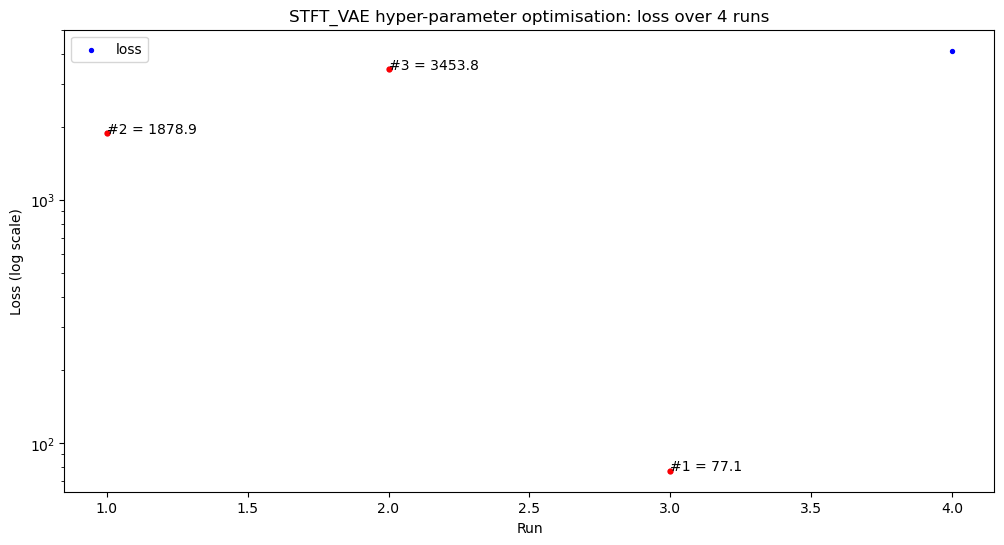

Hyper-Parameter tuning#11: STFT_VAE [4, 1e-06, 10, 1, 10.0]

optimiser: Adam batch=16, learning_rate=1.6e-05, weight_decay=0
STFT_VAE latent=10, layers=1, ratio=10.00
sizes=[20776, 10]
VariationalAutoEncoder: layers=[20776, 10], parameters=644,076, compression=2077.6
model: STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%)
train=813 samples, batch=16 --> 50.8 batches/epoch
Adam: 644,076 trainable parameters
model size penalty=1.0
total=3 sec, epoch=12 (0.2 sec/epoch), train=7132.49 (0.68%), test=7084.46 (-6.30%), overfit=0.99
Early stopping at epoch=20, train loss=6691.9 vs best=141.5, ratio=45.1


Best Models:
	1: loss=77.1, for STFT_VAE latent=10, layers=1, ratio=10.00 (params=644,076, trainable=644,076 = 100.0%) | Adam batch=128, learning_rate=0.013, weight_decay=0
	2: loss=1878.9, for STFT_VAE latent=6, layers=1, ratio=6.24 (params=394,756, trainable=394,756 = 100.0%) | Adam batch=32, learning_rate=0.0001, weight_decay=0
	3: loss=3453.8, for STF

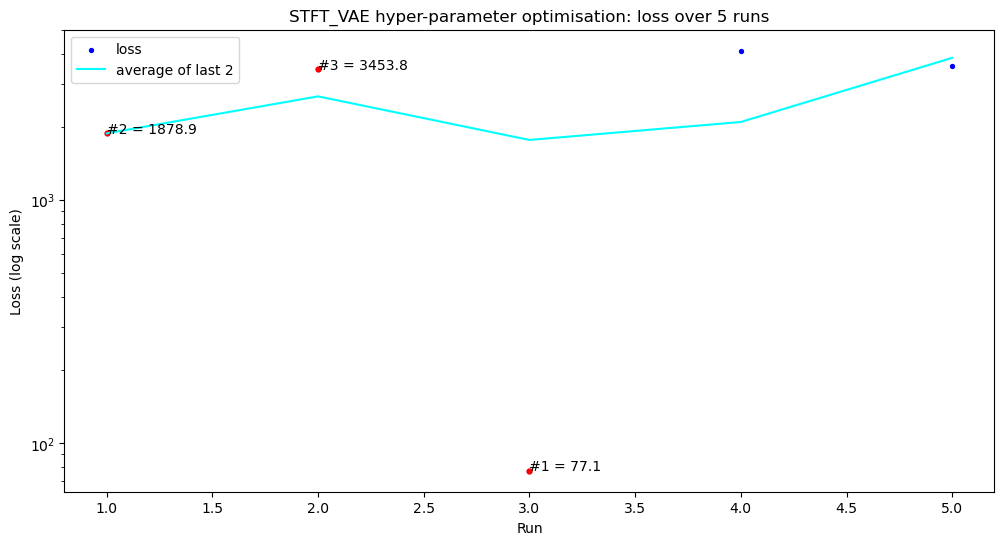

Hyper-Parameter tuning#12: STFT_VAE [4, 9.999999999999999e-05, 4, 1, 10.0]

optimiser: Adam batch=16, learning_rate=0.0016, weight_decay=0
STFT_VAE latent=4, layers=1, ratio=10.00
sizes=[20776, 4]
VariationalAutoEncoder: layers=[20776, 4], parameters=270,096, compression=5194.0
model: STFT_VAE latent=4, layers=1, ratio=10.00 (params=270,096, trainable=270,096 = 100.0%)
train=813 samples, batch=16 --> 50.8 batches/epoch
Adam: 270,096 trainable parameters
model size penalty=0.9
*** Best! loss=75.64, without size penalty 74.74
STFT_VAE latent=4, layers=1, ratio=10.00 (params=270,096, trainable=270,096 = 100.0%)
Adam batch=16, learning_rate=0.0016, weight_decay=0
hyper-parameters: [4, 9.999999999999999e-05, 4, 1, 10.0]


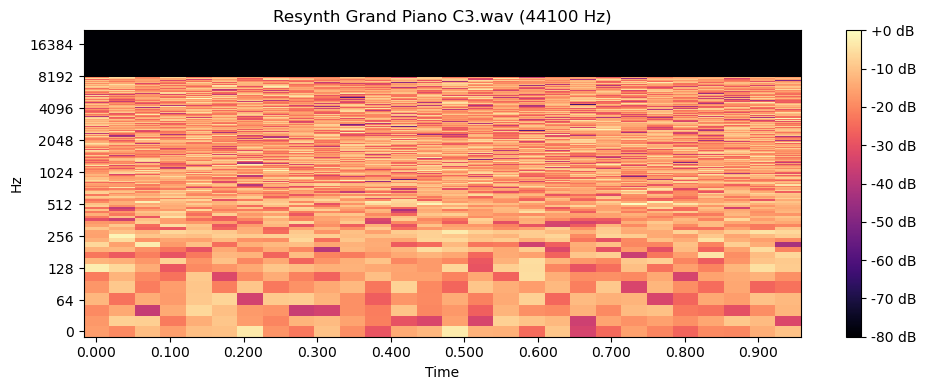

total=3 sec, epoch=14 (0.2 sec/epoch), train=75.64 (-6.66%), test=73.48 (-6.08%), overfit=0.97
*** Best! loss=70.75, without size penalty 69.85
STFT_VAE latent=4, layers=1, ratio=10.00 (params=270,096, trainable=270,096 = 100.0%)
Adam batch=16, learning_rate=0.0016, weight_decay=0
hyper-parameters: [4, 9.999999999999999e-05, 4, 1, 10.0]


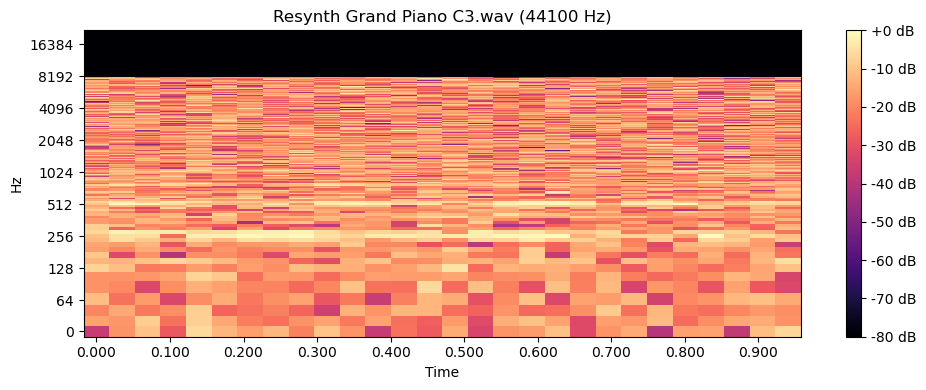

*** Best! loss=67.18, without size penalty 66.28
STFT_VAE latent=4, layers=1, ratio=10.00 (params=270,096, trainable=270,096 = 100.0%)
Adam batch=16, learning_rate=0.0016, weight_decay=0
hyper-parameters: [4, 9.999999999999999e-05, 4, 1, 10.0]


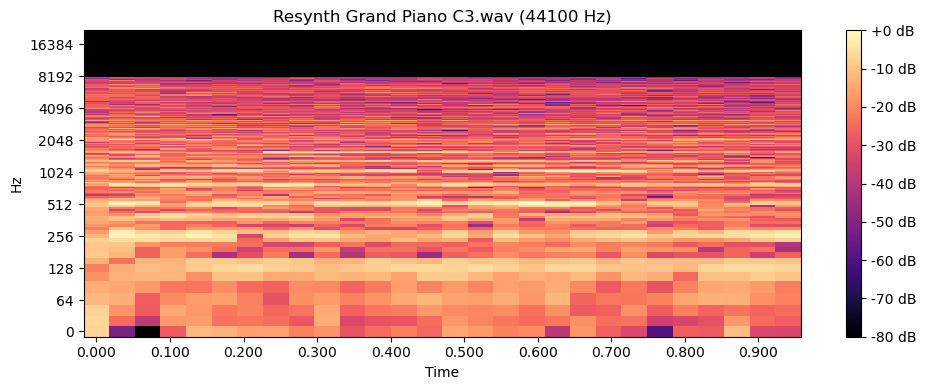

total=8 sec, epoch=38 (0.2 sec/epoch), train=67.04 (-0.22%), test=66.87 (0.05%), overfit=1.00


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"

#model = "MLP_VAE"
#model = "StepWiseMLP"
#model = "MLPVAE_Incremental"

#model = "RNN_VAE"

model = "STFT_VAE"

# First optimise the hyper-parameters for this model
optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
#train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


In [ ]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Print some pretty pictures of the samples and their encodings
demo_all()



